In [1]:
import random
import re
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter

In [2]:
pokoleniya=100
population_size=100
chromosome_bodyoncetoldme=52 # длина хромосомы
selection_count=10 # сколько особей выбирается в селекции
mutation_kek=0.5 # шанс мутации, от 0 до 1
log=False # отображение данных после каждой операции

In [3]:
def parse_tsp_file(filename):
    result = []
    with open(filename) as f:
        for line in f:
            m = re.match(r'(\d+) (\d+\.\d+) (\d+\.\d+)', line)
            if m:
                temp=m.groups()[1:]
                result.append((float(temp[0]), float(temp[1])))
    return result

# parse_tsp_file("berlin52.tsp.txt")

In [4]:
def read_optimal(filename):
    result = []
    with open(filename) as f:
        for line in f:
            m = re.match(r'^\d+$', line.rstrip())
            if m:
                result.append(int(m.group()))

    return result

# read_optimal("berlin52.opt.tour.txt")

In [5]:
data=parse_tsp_file("1/berlin52.tsp.txt") # координаты точек
optimal=read_optimal("1/berlin52.opt.tour.txt") # оптимальный маршрут

In [6]:
# функция приспособленности
def prisposobl(chromosome):
    result=0
    for i in range(0, len(chromosome)):
        a=data[chromosome[i]-1]
        if(i<len(data)-1):
            b=data[chromosome[i+1]-1]
        elif(i==len(data)-1): 
            b=data[chromosome[0]-1]
        result+=math.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)
    return result

prisposobl(optimal)

7544.365901904087

In [7]:
def generate_population(population):
    result=[]
    for i in range(population):
        temp=optimal[1:len(optimal)-1]
        random.shuffle(temp)
        temp.insert(0, optimal[0])
        temp.append(optimal[len(optimal)-1])
        result.append(temp)
    return result

generate_population(5)

[[1,
  43,
  39,
  13,
  36,
  15,
  37,
  35,
  7,
  10,
  38,
  33,
  34,
  12,
  30,
  4,
  24,
  2,
  40,
  17,
  28,
  3,
  8,
  42,
  45,
  6,
  52,
  18,
  50,
  5,
  11,
  47,
  21,
  20,
  46,
  27,
  14,
  19,
  9,
  26,
  32,
  48,
  25,
  31,
  44,
  23,
  29,
  49,
  51,
  41,
  16,
  22],
 [1,
  35,
  38,
  51,
  20,
  39,
  31,
  44,
  36,
  10,
  13,
  23,
  9,
  29,
  4,
  48,
  7,
  50,
  26,
  27,
  2,
  12,
  40,
  18,
  41,
  32,
  42,
  47,
  3,
  33,
  45,
  25,
  16,
  30,
  21,
  19,
  17,
  11,
  37,
  15,
  8,
  14,
  6,
  49,
  34,
  46,
  52,
  5,
  24,
  43,
  28,
  22],
 [1,
  35,
  37,
  32,
  21,
  6,
  3,
  5,
  29,
  39,
  12,
  25,
  20,
  34,
  33,
  18,
  17,
  48,
  9,
  36,
  38,
  42,
  30,
  11,
  49,
  31,
  50,
  24,
  14,
  8,
  41,
  44,
  45,
  27,
  40,
  16,
  46,
  15,
  28,
  52,
  10,
  47,
  19,
  4,
  26,
  2,
  51,
  13,
  23,
  7,
  43,
  22],
 [1,
  2,
  48,
  10,
  31,
  18,
  29,
  49,
  41,
  15,
  14,
  37,
  51,
  20,
  9,
 

In [8]:
def print_population(data):
    df=pd.DataFrame(data)
    print(df)

# лучший маршрут в популяции
def population_best_result(data):
    result=999999
    best_shrek=[]
    for i in data:
        shrek=prisposobl(i)
        if(shrek<result): 
            result=shrek
            best_shrek=i
    return (result, best_shrek)

# худший маршрут в популяции
def population_max_result(data):
    penis=[]
    for i in data:
        penis.append((prisposobl(i), i))
    max_shrek=sorted(penis, key=itemgetter(0), reverse=True)[0]

    return (max_shrek)

# средний маршрут в популяции
def population_average_result(data):
    penis=[]
    for i in data:
        penis.append((prisposobl(i)))
    result=np.mean(penis)

    return result

# sex=generate_population(5)
# print(population_best_result(sex))
# print(population_max_result(sex))
# print(population_average_result(sex))

In [9]:
# каловая селекция
def roulette_selection(data, sel_count):
    pool=[]
    sectors=[]
    wheel=[]
    f_sum=0

    for chromosome in data:
        f=1/(1+prisposobl(chromosome))
        f_sum+=f
    for chromosome in data:
        f=1/(1+prisposobl(chromosome))
        v=f/f_sum*100
        sectors.append((v, chromosome))
    # sectors=sorted(sectors, key=itemgetter(0))
    point=0
    for i in range(0,len(sectors)-1):
        wheel.append((sectors[i][1], (point, point+sectors[i][0])))
        point+=sectors[i][0]
        if(i==len(sectors)-2): 
            wheel.append((sectors[i][1], (point, 100)))
    # print(wheel)
    for i in range(sel_count):
        choice=random.randint(0,100)
        for j in wheel:
            # if((choice>=j[1][0]) and (choice<=j[1][1]) and (j[0] not in pool)): 
            if((choice>=j[1][0]) and (choice<=j[1][1])): 
                pool.append(j[0])
                break
    
    return pool

roulette_selection(generate_population(10), 5)

[[1,
  11,
  20,
  50,
  24,
  6,
  52,
  8,
  38,
  23,
  4,
  21,
  30,
  12,
  33,
  16,
  42,
  45,
  40,
  39,
  2,
  17,
  41,
  43,
  35,
  28,
  5,
  7,
  37,
  49,
  32,
  36,
  10,
  9,
  26,
  13,
  34,
  27,
  25,
  15,
  46,
  29,
  44,
  3,
  14,
  47,
  51,
  31,
  18,
  19,
  48,
  22],
 [1,
  51,
  33,
  25,
  3,
  6,
  7,
  52,
  34,
  36,
  37,
  27,
  35,
  17,
  45,
  41,
  44,
  29,
  8,
  21,
  15,
  40,
  28,
  39,
  42,
  49,
  48,
  30,
  18,
  2,
  11,
  50,
  16,
  31,
  43,
  9,
  26,
  14,
  10,
  4,
  32,
  20,
  47,
  19,
  46,
  24,
  13,
  38,
  5,
  12,
  23,
  22],
 [1,
  11,
  23,
  26,
  24,
  36,
  48,
  37,
  16,
  33,
  51,
  47,
  10,
  25,
  9,
  44,
  46,
  28,
  6,
  18,
  21,
  7,
  13,
  19,
  39,
  45,
  20,
  12,
  43,
  5,
  41,
  31,
  34,
  14,
  15,
  35,
  27,
  8,
  17,
  3,
  32,
  29,
  4,
  50,
  42,
  38,
  49,
  30,
  52,
  2,
  40,
  22],
 [1,
  48,
  19,
  5,
  3,
  26,
  28,
  51,
  42,
  27,
  35,
  6,
  30,
  21,
  41,
  

In [10]:
# нормальная селекция
def simple_selection(data, sel_count):
    pool=[]
    adaptation=[]
    for chromosome in data:
        adaptation.append((prisposobl(chromosome), chromosome))
    adaptation=sorted(adaptation, key=itemgetter(0))
    for i in range(0, sel_count):
        pool.append(adaptation[i][1])

    return pool

simple_selection(generate_population(10), 5)

[[1,
  30,
  24,
  51,
  43,
  6,
  50,
  32,
  29,
  34,
  48,
  36,
  31,
  44,
  15,
  4,
  20,
  39,
  42,
  38,
  10,
  8,
  52,
  16,
  14,
  11,
  25,
  27,
  5,
  23,
  41,
  3,
  9,
  2,
  45,
  28,
  47,
  40,
  7,
  37,
  18,
  35,
  19,
  12,
  26,
  49,
  33,
  46,
  13,
  21,
  17,
  22],
 [1,
  38,
  33,
  29,
  8,
  39,
  34,
  20,
  11,
  9,
  13,
  26,
  12,
  51,
  5,
  2,
  28,
  24,
  3,
  50,
  19,
  35,
  25,
  4,
  6,
  30,
  17,
  21,
  14,
  52,
  10,
  7,
  44,
  31,
  41,
  49,
  48,
  15,
  47,
  18,
  32,
  45,
  40,
  27,
  42,
  37,
  23,
  36,
  43,
  16,
  46,
  22],
 [1,
  6,
  10,
  4,
  26,
  52,
  50,
  31,
  41,
  5,
  24,
  44,
  30,
  9,
  35,
  2,
  16,
  34,
  25,
  17,
  20,
  39,
  48,
  7,
  46,
  11,
  47,
  38,
  28,
  43,
  27,
  51,
  40,
  42,
  8,
  45,
  12,
  49,
  33,
  32,
  37,
  15,
  19,
  29,
  13,
  36,
  14,
  18,
  23,
  21,
  3,
  22],
 [1,
  33,
  43,
  5,
  19,
  9,
  45,
  48,
  38,
  35,
  3,
  49,
  18,
  28,
  8,
  2

In [11]:
# нормальное скрещивание
def permutation_crossover(parent1, parent2, chromo_length):
    chromo_length-=2
    par1_start=parent1[0]
    par2_start=parent2[0]
    par1_end=parent1[len(parent1)-1]
    par2_end=parent2[len(parent1)-1]
    parent1=parent1[1:len(parent1)-1]
    parent2=parent2[1:len(parent2)-1]

    pos1=random.randint(1, chromo_length//2-1)
    pos2=random.randint(pos1+1, chromo_length-1)
    middle=parent1[pos1:pos2+1]
    shrek=[]
    for i in parent2:
        if not (i in middle): shrek.append(i)
    child1=[]
    for i in range(0, chromo_length-1):
        if(i<pos1): child1.append(shrek.pop(0))
        elif(i==pos1): child1+=middle
        elif(i==pos2): child1.append(shrek.pop(0))
        elif(i>pos2) and (len(shrek)>0): child1.append(shrek.pop(0))
        elif(i>pos2) and (len(shrek)==0): child1.append(parent2[i])
    
    middle=parent2[pos1:pos2+1]
    shrek=[]
    for i in parent1:
        if not (i in middle): shrek.append(i)
    child2=[]
    for i in range(0, chromo_length-1):
        if(i<pos1): child2.append(shrek.pop(0))
        elif(i==pos1): child2+=middle
        elif(i==pos2): child2.append(shrek.pop(0))
        elif(i>pos2) and (len(shrek)>0): child2.append(shrek.pop(0))
        elif(i>pos2) and (len(shrek)==0): child2.append(parent1[i])

    child1.insert(0, par1_start)
    child1.append(par1_end)
    child2.insert(0, par2_start)
    child2.append(par2_end)
    return child1, child2

permutation_crossover([1,2,3,4,5,6,7,8], [8,7,6,5,4,3,2,1], 8)

([1, 7, 6, 4, 5, 3, 2, 8], [8, 2, 3, 5, 4, 6, 7, 1])

In [12]:
# каловое скрещивание
def two_point_crossover(parent1, parent2, chromo_length):
    chromo_length-=2
    par1_start=parent1[0]
    par2_start=parent2[0]
    par1_end=parent1[len(parent1)-1]
    par2_end=parent2[len(parent1)-1]
    parent1=parent1[1:len(parent1)-1]
    parent2=parent2[1:len(parent2)-1]

    pos1=random.randint(1, chromo_length//2-1)
    pos2=random.randint(pos1+1, chromo_length-1)

    child1=parent1[0:pos1]+parent2[pos1-1:pos2]+parent1[pos2+1:chromo_length]
    child2=parent2[0:pos1]+parent1[pos1-1:pos2]+parent2[pos2+1:chromo_length]

    child1.insert(0, par1_start)
    child1.append(par1_end)
    child2.insert(0, par2_start)
    child2.append(par2_end)
    return child1, child2

two_point_crossover([1,2,3,4,5,6,7,8], [8,7,6,5,4,3,2,1], 8)

([1, 2, 3, 6, 5, 4, 7, 8], [8, 7, 6, 3, 4, 5, 2, 1])

In [13]:
def mutation(chromosome, chrom_length):
    result=chromosome
    choice=random.random()
    
    if(choice-mutation_kek<=0):
        pos1=random.randint(2, chrom_length//2-1)
        pos2=random.randint(pos1+1, chrom_length-2)
        shrek=result[pos1:pos2+1]
        random.shuffle(shrek)
        result[pos1:pos2+1]=shrek

    return result

mutation([1,2,3,4,5,6,7,8], 8)

[1, 2, 3, 4, 5, 6, 7, 8]

In [14]:
# тут всё происходит
average_results=[]
max_results=[]
min_results=[]
best=[]

if(log):
    current_population=generate_population(population_size)
    print("первая популяция создана:")
    print_population(current_population)
    print("Лучшее значение приспособленности:")
    print(population_best_result(current_population))

    for pok in range(pokoleniya):
        print(f"Поколение {pok+1}")
        current_population=simple_selection(current_population, selection_count) # Здесь менять селекцию
        print("селекция произведена")
        print("результат селекции:")
        print_population(current_population)
        print("Лучшее значение приспособленности после селекции:")
        print(population_best_result(current_population))
        
        for i in range((population_size-selection_count)//2):
            parent1=random.randint(0, selection_count-1)
            parent2=random.randint(0, selection_count-1)
            while(parent2==parent1): parent2=random.randint(0, selection_count-1)
            children=permutation_crossover(current_population[parent1], current_population[parent2], chromosome_bodyoncetoldme) # Здесь менять скрещивание
            current_population.append(children[0])
            current_population.append(children[1])
        if(len(current_population)<population_size): 
            current_population.append(generate_population(1)[0])
        print("скрещивание произведено")
        print("результат скрещивания:")
        print_population(current_population)
        print("Лучшее значение приспособленности после скрещивания:")
        print(population_best_result(current_population))

        temp=current_population
        for i_chel in range(0, len(current_population)-1):
            temp[i_chel]=mutation(current_population[i_chel], chromosome_bodyoncetoldme)
        current_population=temp
        print("мутация произведена")
        print("результат мутации:")
        print_population(current_population)
        print("Лучшее значение приспособленности после мутации:")
        sas1=population_best_result(current_population)
        print(sas1)
        min_results.append(sas1[0])
        max_results.append(population_max_result(current_population)[0])
        average_results.append(population_average_result(current_population))
        best=sas1[1]

        print(f"Конец {pok+1} поколения")
    
else:
    current_population=generate_population(population_size)

    for pok in range(pokoleniya):
        current_population=simple_selection(current_population, selection_count) # Здесь менять селекцию
        
        for i in range((population_size-selection_count)//2):
            parent1=random.randint(0, selection_count-1)
            parent2=random.randint(0, selection_count-1)
            while(parent2==parent1): parent2=random.randint(0, selection_count-1)
            children=permutation_crossover(current_population[parent1], current_population[parent2], chromosome_bodyoncetoldme) # Здесь менять скрещивание
            current_population.append(children[0])
            current_population.append(children[1])
        if(len(current_population)<population_size): 
            current_population.append(generate_population(1)[0])

        temp=current_population
        for i_chel in range(0, len(current_population)-1):
            temp[i_chel]=mutation(current_population[i_chel], chromosome_bodyoncetoldme)
        current_population=temp
        sas1=population_best_result(current_population)
        min_results.append(sas1[0])
        max_results.append(population_max_result(current_population)[0])
        average_results.append(population_average_result(current_population))
        best=sas1[1]
    print(f"Лучший маршрут в конце {pokoleniya} поколения:")
    print(min_results[pokoleniya-1], best)

Лучший маршрут в конце 100 поколения:
13609.638430105775 [1, 45, 8, 10, 43, 24, 26, 27, 13, 14, 52, 12, 33, 9, 41, 19, 3, 17, 21, 7, 2, 42, 49, 39, 36, 35, 34, 44, 46, 5, 37, 15, 4, 38, 25, 28, 16, 50, 20, 31, 23, 18, 6, 40, 29, 30, 47, 51, 11, 48, 32, 22]


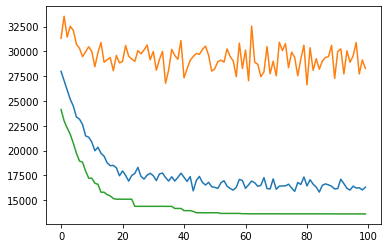

In [15]:
# график приспособленности по поколениям
def draw_progress(average_results, max_results, min_results, pok_count):
    x=range(pok_count)
    y1=average_results
    y2=max_results
    y3=min_results
    plt.plot(x,y1)
    plt.plot(x,y2)
    plt.plot(x,y3)
    plt.show()

draw_progress(average_results, max_results, min_results, pokoleniya)

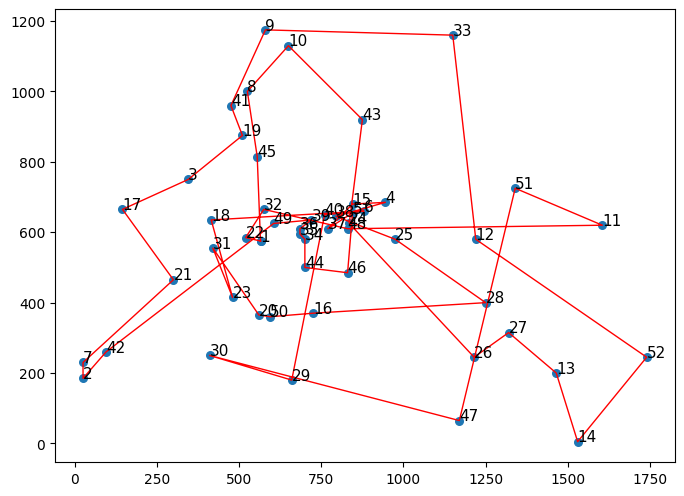

In [16]:
# граф лучшего маршрута
def draw_best_graph(best_shromo):
    plt.figure(figsize=(8, 6), dpi=100)
    x = [data[i-1][0] for i in best_shromo]
    x.append(x[0])
    y = [data[i-1][1] for i in best_shromo]
    y.append(y[0])
    plt.plot(x, y, linewidth=1, color='r')
    plt.scatter(x, y, s=30)
    for i in best_shromo:
        plt.annotate(i, data[i-1], size=11)
    plt.show()
draw_best_graph(best)